In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/Pranita/DL_P/Notebooks/DATA/ts.csv",names=["dates","Passenger"])

In [2]:
A.index=pd.to_datetime(A.dates,format="%Y-%m-%d")

In [3]:
A=A.drop(labels=["dates"],axis=1)

In [4]:
A.head()

,Passenger
dates,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


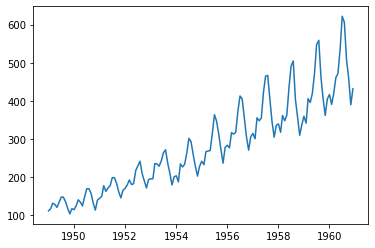

In [5]:
import matplotlib.pyplot as plt
plt.plot(A)
plt.show()

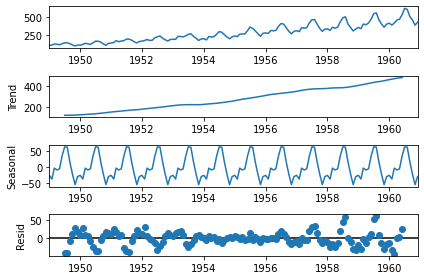

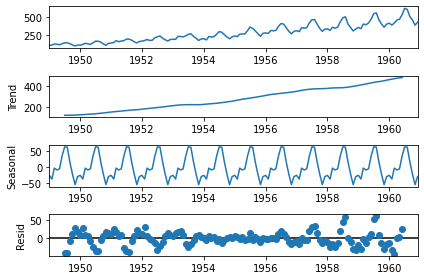

In [6]:
from statsmodels.api import tsa

tsa.seasonal_decompose(A).plot()

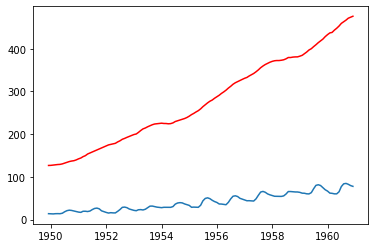

In [7]:
rm=A.rolling(window=12).mean()
rstd=A.rolling(window=12).std()

plt.plot(rm,c="red")
plt.plot(rstd)
plt.show()

In [8]:
#Dicky-Fuller Test

from statsmodels.tsa.stattools import adfuller

q=adfuller(A)
q[1]                #pValue > 0.05 -----> non-stationary

0.9918802434376409

In [9]:
import numpy as np

Alog=np.log(A)

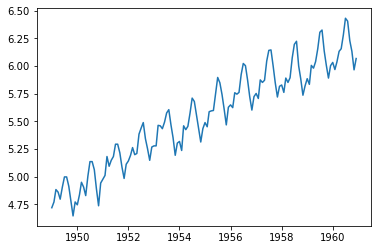

In [10]:
plt.plot(Alog)

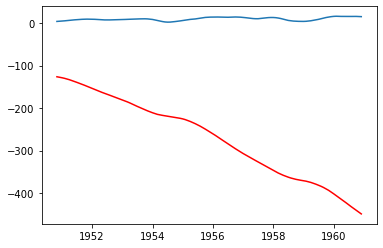

In [11]:
z=Alog-rm

rm=z.rolling(window=12).mean()
rstd=z.rolling(window=12).std()


In [14]:
q=adfuller(z.Passenger[~z.Passenger.isna()])[1]

0.9921114303164102

In [18]:
trd=A[A.index.year<=1958]
tsd=A[A.index.year>1958]

In [24]:
from statsmodels.tsa.ar_model import AR

model=AR(trd).fit()
pred=model.predict(start="1959-01-01",end="1960-12-01")


C:\Users\Pranita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [25]:
tsd["predicted"]=pred

<ipython-input-25-297e145a5690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsd["predicted"]=pred


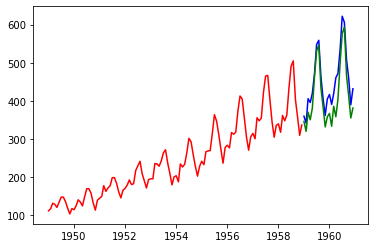

In [26]:
plt.plot(trd,c="red")
plt.plot(tsd.Passenger,c="blue")
plt.plot(tsd.predicted,c="green")